### importing libraries

In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, classification_report

### load the dataset

In [2]:
train_df = pd.read_csv('.//dataset//train.csv')
test_df = pd.read_csv('.//dataset//test.csv')

In [3]:
train_df

,Unnamed: 0,review,label
0,0,I think they really let the quality of the DVD...,0
1,1,I'm sorry but this is just awful. I have told ...,0
2,2,"The Japenese sense of pacing, editing and musi...",0
3,3,"In the '60's/'70's, David Jason was renowned f...",1
4,4,"""Hail The Woman"" is one of the most moving fil...",1
...,...,...,...
39995,39995,When you come across a gem of a movie like thi...,1
39996,39996,I don't often go out of my way to write commen...,0
39997,39997,This is an extremely silly and little seen fil...,0
39998,39998,"Just saw the movie, and the scary thing was, t...",1


#### pre-processing and vectorizing

In [4]:
train_df.drop("Unnamed: 0", axis = 'columns', inplace= True)
ids = test_df.pop("Unnamed: 0")

In [5]:
train_df

,review,label
0,I think they really let the quality of the DVD...,0
1,I'm sorry but this is just awful. I have told ...,0
2,"The Japenese sense of pacing, editing and musi...",0
3,"In the '60's/'70's, David Jason was renowned f...",1
4,"""Hail The Woman"" is one of the most moving fil...",1
...,...,...
39995,When you come across a gem of a movie like thi...,1
39996,I don't often go out of my way to write commen...,0
39997,This is an extremely silly and little seen fil...,0
39998,"Just saw the movie, and the scary thing was, t...",1


In [6]:
train_df.groupby('label').describe()

review                                                               
       count unique                                                top freq
label                                                                      
0      20067  19867  How has this piece of crap stayed on TV this l...    3
1      19933  19858  Loved today's show!!! It was a variety and not...    5

our data is balanced

### buiding model

In [7]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(train_df.review,train_df.label)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
v = CountVectorizer(stop_words='english')
x_train_count = v.fit_transform(x_train.values)

In [10]:
x_test_count = v.transform(x_test)

In [11]:
test_df_count = test_df.review

In [12]:
test_df_count

0       The make -or-break of a love story for me is w...
1       "Bend It Like Beckham" is a film that got very...
2       Pete's Meteor. I seen this referred to as "aut...
3       Funny that I find myself forced to review this...
4       Bare Wench is another softcore parody of the B...
                              ...                        
9995    The only reason I wanted to see this was becau...
9996    Three Russian aristocrats soak up the decadenc...
9997    Greetings again from the darkness. Remember al...
9998    This film is a tour de force from Julie Taymor...
9999    I'll be honest,I finally checked this movie no...
Name: review, Length: 10000, dtype: object

In [13]:
test_df_count = v.transform(test_df_count)

In [14]:
test_df_count

<10000x83377 sparse matrix of type '<class 'numpy.int64'>'
	with 882146 stored elements in Compressed Sparse Row format>

### using grid search cv to find best classifier model and params

In [15]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

In [16]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'fit_intercept': [True,False],
            'solver': ['liblinear','lbfgs'],
            'max_iter': [100,1000,10000]
        }
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'adaboost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [20,50,80,100],
            'learning_rate': [0.1,0.5,0.01]
        }
    },
    'kn_class': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,5, 9 ,13],
            'weights': ['uniform','distance'],
            
        }
    },
    'naive_bayes_ComplementNB': {
        'model': ComplementNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': BernoulliNB(),
        'params': {}
    },
}

In [17]:
import numpy as np

In [18]:
x_train_array = np.array(x_train_count)
x_test_array = np.array(x_test_count)

In [19]:
x_train_array

array(<30000x83272 sparse matrix of type '<class 'numpy.int64'>'
	with 2652245 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [34]:
model = BernoulliNB()

In [35]:
model.fit(x_train_count, y_train)

BernoulliNB()

In [36]:
model.score(x_test_count, y_test)

0.8411

In [26]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train_count, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\chubbyshady\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chubbyshady\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

,model,best_score,best_params
0,logistic_regression,0.880067,"{'C': 1, 'fit_intercept': True, 'max_iter': 10..."
1,naive_bayes_multinomial,0.845500,{}
2,adaboost,0.822967,"{'learning_rate': 0.5, 'n_estimators': 100}"
3,kn_class,0.614833,"{'n_neighbors': 9, 'weights': 'distance'}"
4,naive_bayes_ComplementNB,0.852667,{}


## we can see best models are : Logistic_Regression and Naive_Bayes_ComplementNB

# now we try to do more hyper parameter tuning

In [16]:
op_model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,3,0.5,0.8],
            'fit_intercept': [True,False],
            'solver': ['liblinear','lbfgs'],
            'max_iter': [50,100,200],
            'multi_class': ['auto', 'ovr', 'multinomial'] 
        }
    },
    'naive_bayes_ComplementNB': {
        'model': ComplementNB(),
        'params': {
            'alpha': [0.2,0.5,0.8,1.1,1.4,1.7,2.0,2.3,2.6,2.9,3.2,3.5,3.8,4.1,4.4,4.7,5.0,5.3,5.6,5.9,6.2,6.5,6.8,7.1,7.4,7.7,8.0,8.3,8.6,8.9,9.2,9.5,9.8,10.1],
            'force_alpha': [True,False],
            'fit_prior': [True,False],
            'norm': [True,False]
        }
    }}
    

from sklearn.model_selection import GridSearchCV
op_scores = []

for model_name, mp in op_model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train_count, y_train)
    op_scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
op_df = pd.DataFrame(op_scores,columns=['model','best_score','best_params'])
op_df

In [20]:
op_df

,model,best_score,best_params
0,logistic_regression,0.880900,"{'C': 0.5, 'fit_intercept': True, 'max_iter': ..."
1,naive_bayes_ComplementNB,0.851467,"{'alpha': 8.3, 'fit_prior': True, 'force_alpha..."


In [58]:
op_df.best_params[1]

{'alpha': 8.3, 'fit_prior': True, 'force_alpha': True, 'norm': False}

In [60]:
best_model_log = LogisticRegression(C=0.05, fit_intercept=True, multi_class='auto', solver='lbfgs', max_iter=300)

In [61]:
best_model_naive = ComplementNB(alpha=8.3, fit_prior=True, force_alpha=True, norm=False)

In [62]:
best_model_log.fit(x_train_count,y_train)
best_model_log.score(x_test_count,y_test)

0.8872

In [63]:
best_model_naive.fit(x_train_count,y_train)
best_model_naive.score(x_test_count,y_test)

0.8546

### here we have best logistic and naive model

In [64]:
y_pred_log = best_model_log.predict(x_test_count)
y_pred_naive = best_model_naive.predict(x_test_count)

## classification report log model

In [65]:
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy: {:.2f}".format(accuracy_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5003
           1       0.88      0.90      0.89      4997

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## classification report naive model

In [66]:
accuracy_naive = accuracy_score(y_test, y_pred_naive)
print("Accuracy: {:.2f}".format(accuracy_naive))
print(classification_report(y_test, y_pred_naive))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5003
           1       0.87      0.83      0.85      4997

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



## confusion matrix for log model

In [69]:
from sklearn.metrics import confusion_matrix
cm_best_log = confusion_matrix(y_test, y_pred_log)
cm_best_log

array([[4382,  621],
       [ 507, 4490]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

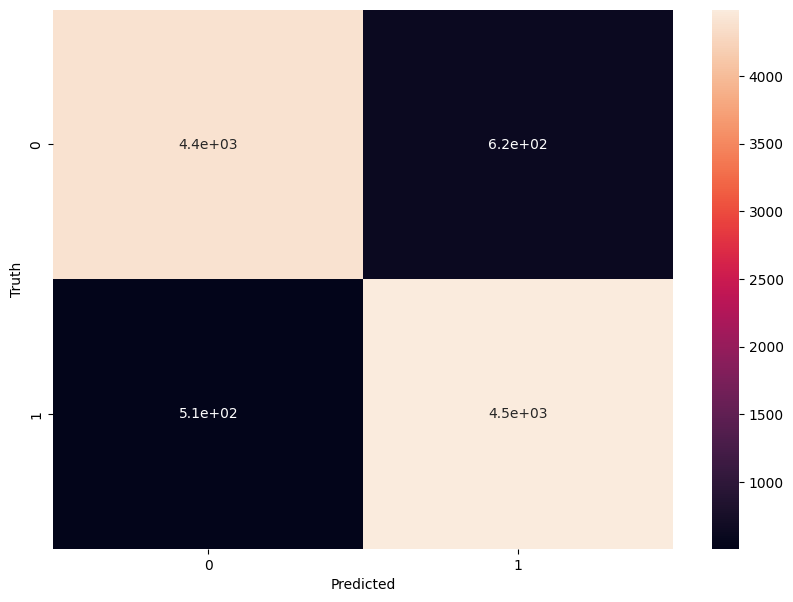

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_best_log,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## confusion matrix for naive model

In [71]:
cm_best_naive = confusion_matrix(y_test, y_pred_naive)
cm_best_naive

array([[4380,  623],
       [ 831, 4166]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

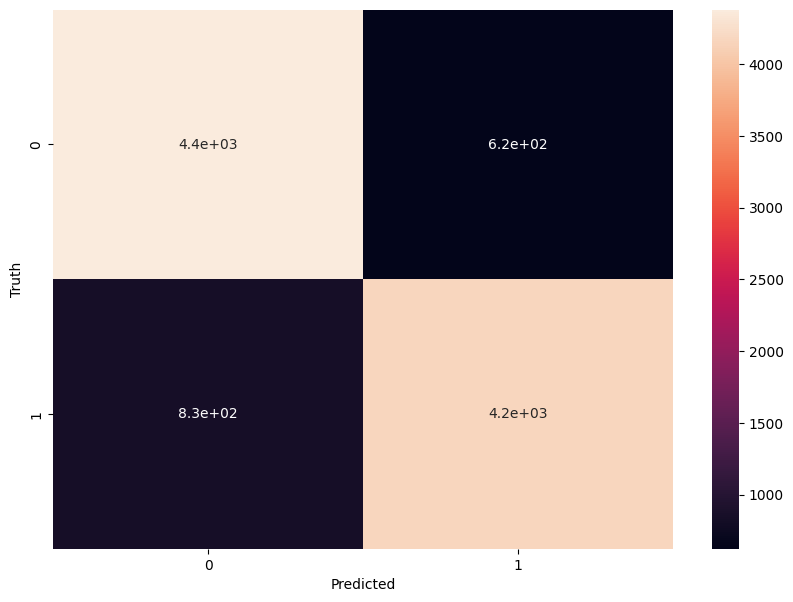

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_best_naive,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## submitting predict for test dataframe

In [73]:
final_pred_log = best_model_log.predict(test_df_count)
final_pred_naive = best_model_naive.predict(test_df_count)

In [74]:
output_log = pd.DataFrame({'Id': ids,
                       'Predicted': final_pred_log.squeeze()})
output_naive = pd.DataFrame({'Id': ids,
                       'Predicted': final_pred_naive.squeeze()})

In [75]:
output_log.to_csv('submission_log.csv', index=False)
output_naive.to_csv('submission_naive.csv', index=False)